## S3 upload and download

In [2]:
import os
from brtdevkit.util.aws import s3

In [2]:
s3_client = s3.S3()
BRT_DEVKIT_WRITE_S3_BUCKET = 'mesa-states'
MODEL_TRAINING_S3_KEY_PREFIX = f"{os.environ.get('BRT_ENV', 'prod')}/jupiter/model_training"
PACK_PERCEPTION_S3_KEY_PREFIX = f"{os.environ.get('BRT_ENV', 'prod')}/jupiter/pack_perception"
bucket_name=BRT_DEVKIT_WRITE_S3_BUCKET

In [ ]:
# upload file
# key = f"{MODEL_TRAINING_S3_KEY_PREFIX}/Jupiter_train_v4_53_missing_human_relabeled.tar"
key = f"{PACK_PERCEPTION_S3_KEY_PREFIX}/Jupiter_train_v4_53_heavy_dust_relabeled.tar"
file_path = "/home/bluerivertech/li.yu/data/Jupiter_train_v4_53_heavy_dust_relabeled/Jupiter_train_v4_53_heavy_dust_relabeled.tar"
s3_client.upload_file(
    bucket_name=bucket_name, key=key, file_path=file_path)
# Jupiter_2022_fn_bag1.tar
# Jupiter_2022Jan15Feb15_rock_stops.tar
# Jupiter_train_v4_53_missing_human_relabeled.tar
# Jupiter_train_v4_53_heavy_dust_relabeled.tar

In [4]:
# download file
# run_id = '45_3_6class_ml_pp_seg_lite_cloud_v10_rotate_fix'
# name = 'driveable_terrain_model_val_bestmodel.pth'
# key = f"{MODEL_TRAINING_S3_KEY_PREFIX}/{run_id}/{name}"

key = f"{PACK_PERCEPTION_S3_KEY_PREFIX}/Jupiter_train_v4_53_heavy_dust_relabeled.tar"

target_path = '/data/jupiter/li.yu/data/Jupiter_train_v4_53/Jupiter_train_v4_53_heavy_dust_relabeled/Jupiter_train_v4_53_heavy_dust_relabeled.tar'
s3_client.download_file(bucket_name, key, target_path)

True

## Resave pretrained weights

In [2]:
import torch
from collections import OrderedDict

# d = torch.load('/mnt/sandbox1/ben.cline/data/20240110/fpn_80k_nextvit_small_1n1k6m_pretrained.pth', map_location=lambda storage, loc: storage)
# print(d.keys())
# ori_keys = d['state_dict'].keys()

In [2]:
# supervised pretraining lite12 model
checkpoint_dir = '/data/jupiter/li.yu/exps/driveable_terrain_model/'
model = 'openimages_v7_brtlite12_0211'
checkpoint = 'checkpoint_best'  # checkpoint or checkpoint_best
input_dict = torch.load(os.path.join(checkpoint_dir, model, f'{checkpoint}.pth'), map_location=lambda storage, loc: storage)
output_dict = OrderedDict()
for k, v in input_dict['model'].items():
    output_dict[k] = v
output_dict = {'state_dict': output_dict}
print(output_dict.keys())
torch.save(output_dict, os.path.join(checkpoint_dir, model, f'{checkpoint}_brt_compatible.pth'))

/tmp/ipykernel_1501361/561890821.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_dict = torch.load(os.path.join(checkpoint_dir, model, f'{checkpoint}.pth'), map_lo

dict_keys(['state_dict'])


In [3]:
# supervised pretraining
checkpoint_dir = '/data/jupiter/li.yu/exps/driveable_terrain_model/'
model = 'coyo300m_nextvits_1030'
checkpoint = 'checkpoint'  # checkpoint or checkpoint_best
input_dict = torch.load(os.path.join(checkpoint_dir, model, f'{checkpoint}.pth'), map_location=lambda storage, loc: storage)
output_dict = OrderedDict()
for k, v in input_dict['model'].items():
    # output_dict['backbone.' + k] = v
    output_dict[k] = v
output_dict = {'state_dict': output_dict}
print(output_dict.keys())
torch.save(output_dict, os.path.join(checkpoint_dir, model, f'{checkpoint}_brt_compatible_212p.pth'))

dict_keys(['state_dict'])


In [2]:
# SparK self-supervised pretraining
checkpoint_dir = '/data/jupiter/li.yu/exps/driveable_terrain_model/'
# model = 'brt1m_spark_nextvit_small_0307'
# model = 'openimages_v7_spark_nextvit_small_0226'
model = 'train600k_spark_nextvit_small_0329'
checkpoint = 'nextvit_small_pretrained_timm_style'  # checkpoint or checkpoint_best
input_dict = torch.load(os.path.join(checkpoint_dir, model, f'{checkpoint}.pth'), map_location=lambda storage, loc: storage)
output_dict = OrderedDict()
for k, v in input_dict.items():
    output_dict['backbone.' + k] = v
output_dict = {'state_dict': output_dict}
print(output_dict.keys())
torch.save(output_dict, os.path.join(checkpoint_dir, model, f'{checkpoint}_brt_compatible.pth'))

dict_keys(['state_dict'])


In [18]:
# DINO self-supervised pretraining
checkpoint_dir = '/data/jupiter/li.yu/exps/driveable_terrain_model/'
model = 'dino_oi_coyo10m_1111'
checkpoint = 'checkpoint'  # checkpoint or checkpoint_best
input_dict = torch.load(os.path.join(checkpoint_dir, model, f'{checkpoint}.pth'), map_location=lambda storage, loc: storage)
output_dict = OrderedDict()
for k, v in input_dict['teacher'].items():
    output_dict[k[16:]] = v  # remove module.backbone.
output_dict = {'state_dict': output_dict}
print(output_dict.keys())
torch.save(output_dict, os.path.join(checkpoint_dir, model, f'{checkpoint}_brt_compatible_teacher.pth'))

/tmp/ipykernel_2074491/588023877.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_dict = torch.load(os.path.join(checkpoint_dir, model, f'{checkpoint}.pth'), map_lo

dict_keys(['state_dict'])


In [20]:
dict2 = torch.load('/data/jupiter/li.yu/exps/driveable_terrain_model/openimages_v7_0131/checkpoint_brt_compatible.pth', map_location=lambda storage, loc: storage)
print(set(output_dict['state_dict'].keys()) - set(dict2['state_dict'].keys()), set(dict2['state_dict'].keys()) - set(output_dict['state_dict'].keys()))

{'proj_head.weight', 'backbone.extra_norm_list.1.bias', '2.weight', 'backbone.extra_norm_list.2.bias', 'backbone.extra_norm_list.1.num_batches_tracked', 'backbone.extra_norm_list.1.weight', '2.bias', 'backbone.extra_norm_list.2.running_var', 'backbone.extra_norm_list.2.weight', '4.weight', 'proj_head.bias', '_layer.weight_g', 'backbone.extra_norm_list.0.weight', '4.bias', 'backbone.extra_norm_list.2.running_mean', 'backbone.extra_norm_list.1.running_mean', '_layer.weight_v', 'backbone.extra_norm_list.1.running_var', 'backbone.extra_norm_list.2.num_batches_tracked', 'backbone.extra_norm_list.0.num_batches_tracked', 'backbone.extra_norm_list.0.bias', 'backbone.extra_norm_list.0.running_mean', 'backbone.extra_norm_list.0.running_var', '0.weight', '0.bias'} {'backbone.proj_head.0.bias', 'backbone.proj_head.0.weight'}


/tmp/ipykernel_2074491/835431266.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dict2 = torch.load('/data/jupiter/li.yu/exps/driveable_terrain_model/openimages_v7_0131/

## Resave trained weights for kore

In [3]:
import torch
from collections import OrderedDict

In [4]:
checkpoint_dir1 = '/mnt/sandbox1/ben.cline/output/bc_sandbox_2024/'
checkpoint_dir2 = '/data/jupiter/li.yu/exps/driveable_terrain_model/'
# model = 'ds_v8_1_nextvit_small_openimages_with_rev1_train_human_test_using_random_val_mhc_20_epochs_finetune_rev1_lr'
# model = 'ds_v8_1_nextvit_small_openimages_using_random_val_50k_rev1_rev2_lying_down_sitting_100_100'
# model = 'ds_v8_1_nextvit_small_openimages_using_random_val_50k_rev1_rev2_lying_down_sitting_2x_lower_airborne_birds_lower_msl_d'
# model = 'ds_v8_1_nextvit_small_openimages_using_random_val_50k_rev1_rev2_lying_down_sitting_2x_lower_airborne_birds_lower_msl_d_2h'
# model = 'all_rev2_rev1_lying_down_sitting_headlights_round_2_25_ep_prod_weights_10_lo_10_tr'
# model = '9_2_unofficial_50k_rev1_rev2_lying_down_sitting_headlights_25_ep_prod_weights_10_lo_100_tr_2'
# model = '9_2_unofficial_50k_rev1_rev2_lying_down_sitting_headlights_50_ep_prod_weights_10_lo_30_tr_2_br_dr_p2_h_p2_v'
# model = '9_2_unofficial_rev1_lying_down_sitting_25_ep_prod_weights_10_lo_10_tr_br_dr_p2_v_p1_m_p1_u'
model = '9_2_unofficial_rev1_lying_down_sitting_25_ep_prod_weights_10_lo_5_tr_br_dr_p2_v_p1_m_p05_u_2'
# checkpoint = 'bc_sandbox_2024_val_bestmodel_master_6'  
checkpoint = 'bc_sandbox_2024_val_bestmodel'  
input_dict = torch.load(os.path.join(checkpoint_dir1, model, f'{checkpoint}.pth'), map_location=lambda storage, loc: storage)
print(input_dict.keys())

# get number of classes in seg model
print('Number of classes in seg model:', input_dict['state_dict']['model.decode_head.conv_seg.weight'].shape[0])

dict_keys(['epoch', 'state_dict', 'optimizer', 'scheduler'])
Number of classes in seg model: 11


In [5]:
output_dict = OrderedDict()
output_dict['epoch'] = input_dict['epoch']
output_dict['state_dict'] = OrderedDict()
for k,v in input_dict['state_dict'].items():
    if k.startswith('scale_'):
        output_dict['state_dict']['head.'+k] = v
    else:
        output_dict['state_dict'][k] = v

os.makedirs(os.path.join(checkpoint_dir2, model), exist_ok=True)
saved_path = os.path.join(checkpoint_dir2, model, f'{checkpoint}_brtkore_compatible.pth')
torch.save(output_dict, saved_path)
print(saved_path)

/data/jupiter/li.yu/exps/driveable_terrain_model/9_2_unofficial_rev1_lying_down_sitting_25_ep_prod_weights_10_lo_5_tr_br_dr_p2_v_p1_m_p05_u_2/bc_sandbox_2024_val_bestmodel_brtkore_compatible.pth


In [8]:
# trained dust head model
# dust_head = '9_2_unofficial_50k_rev1_rev2_lying_down_sitting_headlights_50_ep_prod_weights_10_lo_30_tr_2_br_dr_p2_h_p2_v_dust_0617'
dust_head = '9_2_unofficial_rev1_lying_down_sitting_25_ep_prod_weights_10_lo_10_tr_br_dr_p2_v_p1_m_p1_u_finetune_dust_0623'
dust_model = f'/data/jupiter/li.yu/exps/driveable_terrain_model/{dust_head}/checkpoints/best.ckpt'
dust_dict = torch.load(dust_model, map_location=lambda storage, loc: storage)
print(dust_dict.keys())
# get number of classes in seg model
print('Number of classes in seg model:', dust_dict['state_dict']['model.decode_head.conv_seg.weight'].shape[0])

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])
Number of classes in seg model: 11


In [16]:
# dust_dict['state_dict']['model.decode_head.conv_seg.weight'] = input_dict['state_dict']['model.decode_head.conv_seg.weight']
# dust_dict['state_dict']['model.decode_head.conv_seg.bias'] = input_dict['state_dict']['model.decode_head.conv_seg.bias']
# torch.save(dust_dict, '/data/jupiter/li.yu/exps/driveable_terrain_model/9_2_unofficial_rev1_lying_down_sitting_25_ep_prod_weights_10_lo_10_tr_br_dr_p2_v_p1_m_p1_u_finetune_dust_0621/checkpoints/best.ckpt')

In [9]:
keys = dust_dict['state_dict'].keys()
for key in keys:
    if key in input_dict['state_dict'] and key in dust_dict['state_dict']:
        ori_val = input_dict['state_dict'][key]
        dust_val = dust_dict['state_dict'][key]
        diff = torch.sum(torch.abs(ori_val - dust_val)) / torch.sum(torch.abs(ori_val))
        if diff > 1e-5:
            print(key, diff)

model.backbone.stem.0.conv.weight tensor(0.7600)
model.backbone.stem.0.norm.weight tensor(0.2920)
model.backbone.stem.0.norm.bias tensor(0.2861)
model.backbone.stem.0.norm.running_mean tensor(0.7333)
model.backbone.stem.0.norm.running_var tensor(0.8848)
model.backbone.stem.1.conv.weight tensor(0.8179)
model.backbone.stem.1.norm.weight tensor(0.1383)
model.backbone.stem.1.norm.bias tensor(0.2339)
model.backbone.stem.1.norm.running_mean tensor(0.8409)
model.backbone.stem.1.norm.running_var tensor(0.9614)
model.backbone.stem.2.conv.weight tensor(0.8024)
model.backbone.stem.2.norm.weight tensor(0.1301)
model.backbone.stem.2.norm.bias tensor(0.4622)
model.backbone.stem.2.norm.running_mean tensor(0.8245)
model.backbone.stem.2.norm.running_var tensor(0.9350)
model.backbone.stem.3.conv.weight tensor(0.8120)
model.backbone.stem.3.norm.weight tensor(0.0856)
model.backbone.stem.3.norm.bias tensor(0.3471)
model.backbone.stem.3.norm.running_mean tensor(0.8007)
model.backbone.stem.3.norm.running_var

## Check output shape after conv layers

In [13]:
import os
import sys
import torch
from torch.nn import functional as F
sys.path.append('/home/li.yu/code/JupiterCVML/')
sys.path.append('/home/li.yu/code/JupiterCVML/europa/base/src/europa')

from dl.depth_model.models.modules.convs import Conv2dBlock, ResidualBlock

In [6]:
layer = Conv2dBlock(
    in_channels=128,
    out_channels=64,
    kernel_size=3,
    stride=2,
    padding=1,
    dilation=1,
)

In [7]:
x = torch.rand(4, 128, 16, 20)
print(x.shape)
y = layer(x)
print(y.shape)

torch.Size([4, 128, 16, 20])
torch.Size([4, 64, 8, 10])


In [20]:
pool = torch.nn.AvgPool2d(kernel_size=[4, 5], stride=[1, 1])
x = torch.rand(4, 32, 4, 5)
print(x.shape)
y = pool(x)
print(y.shape)

torch.Size([4, 32, 4, 5])
torch.Size([4, 32, 1, 1])


In [21]:
# x = torch.rand(4, 32, 4, 5)
print(x.shape)
y2 = F.adaptive_avg_pool2d(x, output_size=1)
print(y2.shape)

torch.Size([4, 32, 4, 5])
torch.Size([4, 32, 1, 1])


In [24]:
torch.sum(torch.abs(y - y2)) / torch.sum(torch.abs(y))

tensor(5.8781e-08)

## Check lightly train API

In [1]:
import torch
from collections import OrderedDict
import lightly_train
from lightly_train import train
print(lightly_train.__version__)
# train()

0.2.5


In [1]:
import pydantic
print(pydantic.__version__)
from pydantic import field_validator

2.0.3


In [2]:
import __main__
import sys
sys.path.append('/mnt/sandbox1/li.yu/code/dl-sandbox/jj/lightly')
from pretrain import NextVitSmall
setattr(__main__, "NextVitSmall", NextVitSmall)

In [3]:
model_dir = '/data/jupiter/li.yu/exps/driveable_terrain_model'
model = 'lightly_dino_pt0131_rev1_24m_rev2_5m_1013'
# save lightly checkpoint to plain checkpoint
lightly_ckpt = os.path.join(model_dir, model, 'checkpoints/last.ckpt')
plain_pth = os.path.join(model_dir, model, 'checkpoints/last.pth')
lightly_train.export(
    checkpoint=lightly_ckpt,   # Path the the last checkpoint from training.
    out=plain_pth,            # Path where the state dict of your model will be saved.
    part="model",                                       # Which part of the model to export. This should usually be set to "model".
    format="torch_state_dict",                          # The format in which you want to export the model.
)

Args: { 'checkpoint': '/data/jupiter/li.yu/exps/driveable_terrain_model/lightly_dino_pt0131_rev1_24m_rev2_5m_1013/checkpoints/last.ckpt',
  'format': 'torch_state_dict',
  'out': '/data/jupiter/li.yu/exps/driveable_terrain_model/lightly_dino_pt0131_rev1_24m_rev2_5m_1013/checkpoints/last.pth',
  'overwrite': False,
  'part': 'model'}
INFO:lightly_train._commands.export:Args: { 'checkpoint': '/data/jupiter/li.yu/exps/driveable_terrain_model/lightly_dino_pt0131_rev1_24m_rev2_5m_1013/checkpoints/last.ckpt',
  'format': 'torch_state_dict',
  'out': '/data/jupiter/li.yu/exps/driveable_terrain_model/lightly_dino_pt0131_rev1_24m_rev2_5m_1013/checkpoints/last.pth',
  'overwrite': False,
  'part': 'model'}
Exporting 'model' as 'torch_state_dict'.
INFO:lightly_train._commands.export:Exporting 'model' as 'torch_state_dict'.
DEBUG:lightly_train._commands.export:Getting model part for 'model'.
DEBUG:lightly_train._commands.export:Getting model format for 'torch_state_dict'.
DEBUG:lightly_train._comm

In [4]:
# save plain checkpoint to brt compatible checkpoint
plain_pth = os.path.join(model_dir, model, 'checkpoints/last.pth')
brt_pth = os.path.join(model_dir, model, 'checkpoints/last_brt_compatible.pth')
input_dict = torch.load(plain_pth, map_location=lambda storage, loc: storage)
output_dict = OrderedDict()
# for k, v in input_dict.items():
#     output_dict['backbone.' + k] = v
output_dict = {'state_dict': input_dict}
print(output_dict.keys())

torch.save(output_dict, brt_pth)

/tmp/ipykernel_1817902/872985412.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_dict = torch.load(plain_pth, map_location=lambda storage, loc: storage)

  input_d

dict_keys(['state_dict'])


In [1]:
# import timm
# from timm.models import create_model
# print(timm.__version__)
# model = create_model(
#     'nextvit_small',
#     num_classes=3,
# )
# sum(p.numel() for p in model.parameters() if p.requires_grad)

1.0.9


30741443

In [6]:
# import torch
# from torch import Tensor
# from torch.nn import functional

# import sys
# sys.path.append('/home/li.yu/code/JupiterCVML/europa/base/src/europa')
# from dl.network.nextvit_brt import _get_nextvit

# class NextVitSmall(torch.nn.Module):
#     """BRT Segmentation model with extra methods to make it a custom model supported
#     by LightlyTrain."""
#     def __init__(self) -> None:
#         super().__init__()

#         # define backbone
#         self.backbone = _get_nextvit(
#             model_size="small",
#             frozen_stages=-1,
#             norm_eval=False,
#             with_extra_norm=True,
#             norm_cfg=dict(type="SyncBN", requires_grad=True),
#             in_channels=3,
#         )

#     def forward_features(self, x: Tensor) -> Tensor:
#         y = self.backbone(x)
#         return y[-1]

#     def forward_pool(self, x: Tensor) -> Tensor:
#         return functional.adaptive_avg_pool2d(x, (1, 1))

#     def num_features(self) -> int:
#         return 1024

from torch.nn import functional

import sys
sys.path.append('/home/li.yu/code/JupiterCVML/europa/base/src/europa')
from dl.network.nextvit_brt import _get_nextvit

class NextVitSmall(torch.nn.Module):
    """BRT Segmentation model with definition to make it a custom model supported."""
    def __init__(self, num_classes) -> None:
        super().__init__()

        # define backbone
        self.backbone = _get_nextvit(
            model_size="small",
            frozen_stages=-1,
            norm_eval=False,
            with_extra_norm=True,
            norm_cfg=dict(type="SyncBN", requires_grad=True),
            in_channels=3,
        )

        # self.proj_head = torch.nn.Sequential(
        #     torch.nn.Linear(1024, num_classes),
        # )
        self.proj_head = torch.nn.Linear(1024, num_classes)

    def forward(self, x):
        y = self.backbone(x)
        y = functional.adaptive_avg_pool2d(y[-1], (1, 1))
        y = torch.flatten(y, 1)
        y = self.proj_head(y)

        return y

model = NextVitSmall(1024)
sum(p.numel() for p in model.parameters() if p.requires_grad)

31789696

In [7]:
import torch

ckpt_path = '/data/jupiter/li.yu/exps/driveable_terrain_model/openimages_v7_0131/checkpoint_brt_compatible.pth'
# ckpt_path = '/data/jupiter/li.yu/exps/driveable_terrain_model/lightly_densecl_pt0131_oi_coyo1m_0928/checkpoints/last.pth'
# ckpt_path = '/mnt/sandbox1/ben.cline/logs/bc_sandbox_2024_q4/11_1_rev1_train_human_test_dean_multires/checkpoints/best.ckpt'

input_dict = torch.load(ckpt_path, map_location=lambda storage, loc: storage, weights_only=False)
if len(input_dict.keys()) < 10:  # when contain other states like from optimizer, epoch number etc
    print(input_dict.keys())

if 'model' in input_dict:
    state_dict = input_dict['model']
elif 'state_dict' in input_dict:
    state_dict = input_dict['state_dict']
else:
    state_dict = input_dict
if 'model.backbone.stem.0.conv.weight' in state_dict:
    new_state_dict = {}
    for k,v in state_dict.items():
        if k.startswith('model.backbone'):
            new_state_dict[k[6:]] = v
    state_dict = new_state_dict
missing_keys, unexpected_keys = model.load_state_dict(state_dict, strict=False)
print(len(missing_keys), len(unexpected_keys))
print(len(model.state_dict()), len(state_dict))

dict_keys(['state_dict'])
14 2
487 472


In [9]:
missing_keys

['backbone.extra_norm_list.0.weight',
 'backbone.extra_norm_list.0.bias',
 'backbone.extra_norm_list.0.running_mean',
 'backbone.extra_norm_list.0.running_var',
 'backbone.extra_norm_list.1.weight',
 'backbone.extra_norm_list.1.bias',
 'backbone.extra_norm_list.1.running_mean',
 'backbone.extra_norm_list.1.running_var',
 'backbone.extra_norm_list.2.weight',
 'backbone.extra_norm_list.2.bias',
 'backbone.extra_norm_list.2.running_mean',
 'backbone.extra_norm_list.2.running_var']

In [8]:
unexpected_keys

['backbone.proj_head.0.weight', 'backbone.proj_head.0.bias']

In [1]:
import torch
ckpt_path = '/mnt/sandbox1/ben.cline/logs/bc_sandbox_2024_q4/11_3_rev1_train_human_test_dean_multires_ignore_trees_1p25_u_p5_h_p2_v_ft_from_rev1_22kdust_ft_p15dust_h_fresh/checkpoints/best.ckpt'
input_dict = torch.load(ckpt_path, map_location=lambda storage, loc: storage, weights_only=False)

In [5]:
keys = input_dict['state_dict'].keys()
print(len(keys), len([key for key in keys if key.startswith('model.backbone')]))

609 485


## Load large foundation model for semantic segmentation

In [24]:
import torch
import torch.nn.functional as F
import numpy as np

# DINOv2
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dinov2_vits14.cuda()

Using cache found in /home/li.yu/.cache/torch/hub/facebookresearch_dinov2_main


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0): NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate=none)
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
    (1): NestedTen

In [9]:
BACKBONE_SIZE = "small" # in ("small", "base", "large" or "giant")


backbone_archs = {
    "small": "vits14",
    "base": "vitb14",
    "large": "vitl14",
    "giant": "vitg14",
}
backbone_arch = backbone_archs[BACKBONE_SIZE]
backbone_name = f"dinov2_{backbone_arch}"

backbone_model = torch.hub.load(repo_or_dir="facebookresearch/dinov2", model=backbone_name)
backbone_model.eval()
backbone_model.cuda()

Using cache found in /home/li.yu/.cache/torch/hub/facebookresearch_dinov2_main


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0): NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate=none)
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
    (1): NestedTen

In [36]:
import inspect
inspect.getfile(init_segmentor)

import mmcv.cnn
inspect.getfile(mmcv.cnn)

'/home/li.yu/anaconda3/envs/mmcvseg/lib/python3.10/site-packages/mmcv/cnn/__init__.py'

In [11]:
import urllib
import math
import inspect
import itertools
from functools import partial

import mmcv
from mmcv.runner import load_checkpoint
from mmseg.apis import init_segmentor, inference_segmentor

import sys
sys.path.append('/home/li.yu/code/dinov2.bk')
import dinov2.eval.segmentation.models

class CenterPadding(torch.nn.Module):
    def __init__(self, multiple):
        super().__init__()
        self.multiple = multiple

    def _get_pad(self, size):
        new_size = math.ceil(size / self.multiple) * self.multiple
        pad_size = new_size - size
        pad_size_left = pad_size // 2
        pad_size_right = pad_size - pad_size_left
        return pad_size_left, pad_size_right

    @torch.inference_mode()
    def forward(self, x):
        pads = list(itertools.chain.from_iterable(self._get_pad(m) for m in x.shape[:1:-1]))
        output = F.pad(x, pads)
        return output

def create_segmenter(cfg, backbone_model):
    model = init_segmentor(cfg)
    model.backbone.forward = partial(
        backbone_model.get_intermediate_layers,
        n=cfg.model.backbone.out_indices,
        reshape=True,
    )
    if hasattr(backbone_model, "patch_size"):
        model.backbone.register_forward_pre_hook(lambda _, x: CenterPadding(backbone_model.patch_size)(x[0]))
    model.init_weights()
    return model

def load_config_from_url(url: str) -> str:
    with urllib.request.urlopen(url) as f:
        return f.read().decode()


HEAD_SCALE_COUNT = 3 # more scales: slower but better results, in (1,2,3,4,5)
HEAD_DATASET = "voc2012" # in ("ade20k", "voc2012")
HEAD_TYPE = "ms" # in ("ms, "linear")

DINOV2_BASE_URL = "https://dl.fbaipublicfiles.com/dinov2"
head_config_url = f"{DINOV2_BASE_URL}/{backbone_name}/{backbone_name}_{HEAD_DATASET}_{HEAD_TYPE}_config.py"
head_checkpoint_url = f"{DINOV2_BASE_URL}/{backbone_name}/{backbone_name}_{HEAD_DATASET}_{HEAD_TYPE}_head.pth"

cfg_str = load_config_from_url(head_config_url)
cfg = mmcv.Config.fromstring(cfg_str, file_format=".py")
if HEAD_TYPE == "ms":
    cfg.data.test.pipeline[1]["img_ratios"] = cfg.data.test.pipeline[1]["img_ratios"][:HEAD_SCALE_COUNT]
    print("scales:", cfg.data.test.pipeline[1]["img_ratios"])

model = create_segmenter(cfg, backbone_model=backbone_model)
load_checkpoint(model, head_checkpoint_url, map_location="cpu")
model.cuda()
model.eval()

2024-11-26 08:00:39,039 - mmcv - INFO - initialize BNHead with init_cfg {'type': 'Normal', 'std': 0.01, 'override': {'name': 'conv_seg'}}
2024-11-26 08:00:39,042 - mmcv - INFO - 
decode_head.conv_seg.weight - torch.Size([21, 1536, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-11-26 08:00:39,043 - mmcv - INFO - 
decode_head.conv_seg.bias - torch.Size([21]): 
NormalInit: mean=0, std=0.01, bias=0 
 
2024-11-26 08:00:39,044 - mmcv - INFO - 
decode_head.bn.weight - torch.Size([1536]): 
The value is the same before and after calling `init_weights` of EncoderDecoder  
 
2024-11-26 08:00:39,045 - mmcv - INFO - 
decode_head.bn.bias - torch.Size([1536]): 
The value is the same before and after calling `init_weights` of EncoderDecoder  
 


scales: [1.0, 1.32, 1.73]
load checkpoint from http path: https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_voc2012_ms_head.pth


EncoderDecoder(
  (backbone): DinoVisionTransformer()
  (decode_head): BNHead(
    input_transform=resize_concat, ignore_index=255, align_corners=False
    (loss_decode): CrossEntropyLoss(avg_non_ignore=False)
    (conv_seg): Conv2d(1536, 21, kernel_size=(1, 1), stride=(1, 1))
    (bn): SyncBatchNorm(1536, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  init_cfg={'type': 'Normal', 'std': 0.01, 'override': {'name': 'conv_seg'}}
)

In [34]:
x = torch.rand(2, 3, 224, 224).cuda()

y = dinov2_vits14(x, is_training=False)
print(x.shape, y.shape)

y = dinov2_vits14(x, is_training=True)
print(x.shape, y.keys())

y = dinov2_vits14.get_intermediate_layers(x, n=4)
# y = backbone_model(x)
print(x.shape, len(y))
print([yi.shape for yi in y])

torch.Size([2, 3, 224, 224]) torch.Size([2, 384])
torch.Size([2, 3, 224, 224]) dict_keys(['x_norm_clstoken', 'x_norm_regtokens', 'x_norm_patchtokens', 'x_prenorm', 'masks'])
torch.Size([2, 3, 224, 224]) 4
[torch.Size([2, 256, 384]), torch.Size([2, 256, 384]), torch.Size([2, 256, 384]), torch.Size([2, 256, 384])]


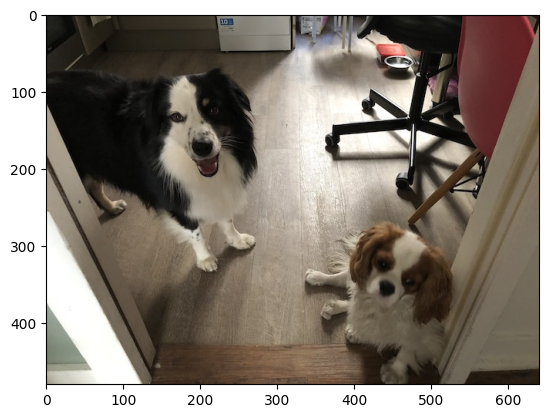

In [15]:
import urllib
from PIL import Image
import matplotlib.pyplot as plt


def load_image_from_url(url: str) -> Image:
    with urllib.request.urlopen(url) as f:
        return Image.open(f).convert("RGB")


EXAMPLE_IMAGE_URL = "https://dl.fbaipublicfiles.com/dinov2/images/example.jpg"

image = load_image_from_url(EXAMPLE_IMAGE_URL)

plt.imshow(image)
plt.show()

In [17]:
# x = np.random.rand(224, 224, 3)
x = np.array(image)[:,:,::-1]
y = inference_segmentor(model, x)
type(y), len(y), y[0].shape

(list, 1, (480, 640))

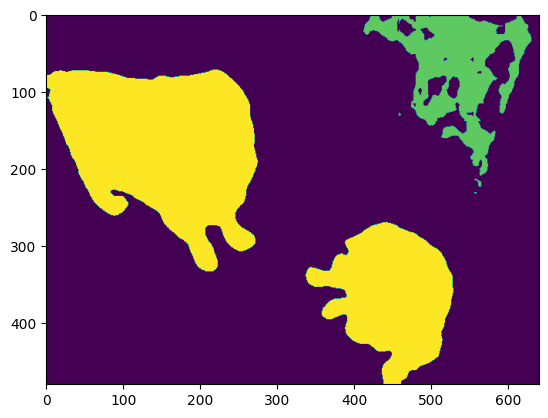

In [19]:
plt.imshow(y[0])
plt.show()

## Random code